# Ejercicio 2

In [1]:
import matplotlib.pyplot as plt
import cv2
import statistics
import numpy as np

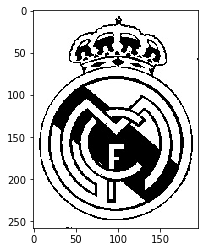

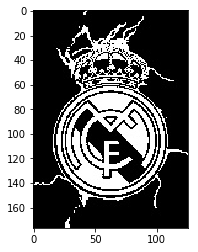

ResultadoOR


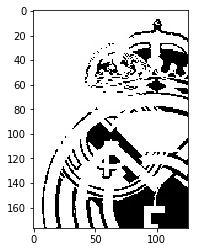

ResultadoAND


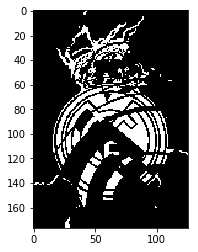

ResultadoXOR


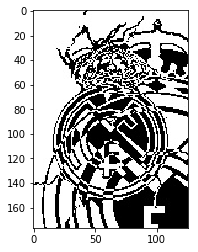

ResultadoSUMA


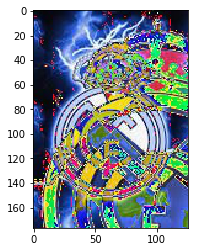

ResultadoRESTA


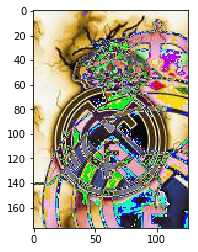

In [53]:
def operar(imagen, imagen2, tipo, showoriginal):
    image = cv2.imread(imagen)
    ancho = image.shape[0]
    alto = image.shape[1]
    image2 = cv2.imread(imagen2)
    ancho2 = image2.shape[0]
    alto2 = image2.shape[1]
    if tipo == 'SUMA' or tipo == "RESTA" :
        op = np.zeros((ancho2,alto2,3))
        for i in range(0,ancho2):
            for j in range(0,alto2):
                pixel1 = image[i,j]
                pixel2 = image2[i,j]
                if tipo == 'SUMA':
                    op[i,j] = pixel1 + pixel2
                if tipo == 'RESTA':
                    op[i,j] = pixel1 - pixel2
    if tipo == 'OR' or tipo == "AND" or tipo == "XOR":
        gray = np.zeros((ancho,alto))
        for i in range(0,ancho):
            for j in range(0,alto):
                pixel = image[i,j]
                gray[i,j]=( (0.3 * pixel[2]) + (0.59 * pixel[1]) + (0.11 * pixel[0]) )
        ret, thresh1 = cv2.threshold(gray, 175, 255, cv2.THRESH_BINARY) 

        
        gray2 = np.zeros((ancho2,alto2))
        for i in range(0,ancho2):
            for j in range(0,alto2):
                pixel = image2[i,j]
                gray2[i,j]=( (0.3 * pixel[2]) + (0.59 * pixel[1]) + (0.11 * pixel[0]) )
        ret2, thresh2 = cv2.threshold(gray2, 175, 255, cv2.THRESH_BINARY) 


        cv2.imwrite('binary.jpg', thresh1) 

        imagenponderada = cv2.imread('binary.jpg')
        imagenponderada = cv2.cvtColor(imagenponderada, cv2.COLOR_BGR2RGB)

        cv2.imwrite('binary2.jpg', thresh2) 

        imagenponderada2 = cv2.imread('binary2.jpg')
        imagenponderada2 = cv2.cvtColor(imagenponderada2, cv2.COLOR_BGR2RGB)
    if tipo == 'OR':
        op = np.zeros((ancho2,alto2))
        for i in range(0,ancho2):
            for j in range(0,alto2):
                pixel1 = thresh1[i,j]
                pixel2 = thresh2[i,j]
                op[i,j] = pixel1 + pixel2
    if tipo == 'AND':
        op = np.zeros((ancho2,alto2))
        for i in range(0,ancho2):
            for j in range(0,alto2):
                pixel1 = thresh1[i,j]
                pixel2 = thresh2[i,j]
                op[i,j] = pixel1 * pixel2
    if tipo == 'XOR':
        op = np.zeros((ancho2,alto2))
        for i in range(0,ancho2):
            for j in range(0,alto2):
                pixel1 = thresh1[i,j]
                pixel2 = thresh2[i,j]
                if pixel1 == pixel2:
                    op[i,j] = 0
                else:
                    op[i,j] = 255
    
    cv2.imwrite('resultado.jpg', op) 
    
    res = cv2.imread('resultado.jpg')
    res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
    if showoriginal:
        plt.imshow(imagenponderada)
        plt.show()
        plt.imshow(imagenponderada2)
        plt.show()
    print('Resultado' + tipo)
    plt.imshow(res)
    plt.show()
operar('../LogoRM.jpeg', '../LogoRM2.jpeg','OR', True)
operar('../LogoRM.jpeg', '../LogoRM2.jpeg','AND', False)
operar('../LogoRM.jpeg', '../LogoRM2.jpeg','XOR', False)
operar('../LogoRM.jpeg', '../LogoRM2.jpeg','SUMA', False)
operar('../LogoRM.jpeg', '../LogoRM2.jpeg','RESTA', False)